# Regularized Linear Regression and Bias v.s. Variance

In [1]:
%cd C:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex5\\ex5
%pwd

C:\Users\s\Downloads\machine_learning\machine-learning-ex5\ex5


'C:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex5\\ex5'

## Regularized Linear Regression

### Visualizing the dataset

(12, 1) (12, 1)
(21, 1) (21, 1)
(21, 1) (21, 1)


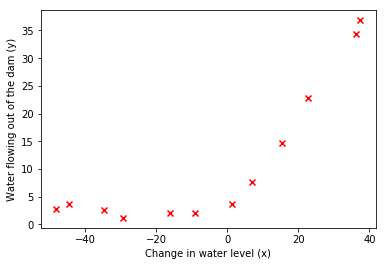

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import optimize


data = loadmat('ex5data1.mat')
#print(data)

x0 = data['X']
xx0 = np.hstack((np.ones((x0.shape[0], 1)), x0))
y0 = data['y']
print(x0.shape, y0.shape)
x_val0 = data['Xval']
xx_val0 = np.hstack((np.ones((x_val0.shape[0], 1)), x_val0))
y_val0 = data['yval']
print(x_val0.shape, y_val0.shape)
x_test0 = data['Xtest']
xx_test0 = np.hstack((np.ones((x_test0.shape[0], 1)), x_test0))
y_test0 = data['ytest']
print(x_test0.shape, y_test0.shape)

plt.scatter(x0, y0, color='r', marker='x')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

### Regularized linear regression cost function

In [4]:
def linear_reg_cost(theta, x, y, lam):
    m = x.shape[0]
    theta = theta.reshape(-1, 1)
    theta_1 = theta[1:,]
    j = 1 / (2 * m) * np.sum((x.dot(theta) - y) ** 2)
    reg = lam / (2 * m) * theta_1.T.dot(theta_1)
    j += reg
    
    return j

print(linear_reg_cost(np.array([1, 1]), xx0, y0, 1))

[[303.99319222]]


### Regularized linear regression gradient

In [5]:
def linear_reg_grad(theta, x, y, lam):
    m = x.shape[0]
    theta = theta.reshape(-1, 1)
    theta_1 = theta[1:,]
    grad = 1 / m * x.T.dot(x.dot(theta) - y)
    reg = lam / m * theta_1
    grad[1:,] += reg
    
    return grad.ravel()

print(linear_reg_grad(np.array([1, 1]), xx0, y0, 1))

[-15.30301567 598.25074417]


### Fitting linear regression

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


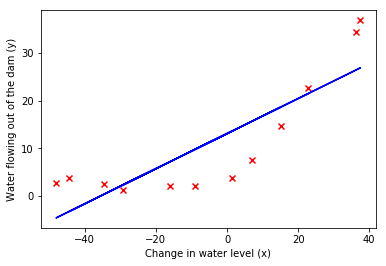

In [6]:
def train_linear_reg(x, y, lam):
    n = x.shape[1]
    theta = np.zeros((n, 1)).ravel()
    res = optimize.minimize(fun=linear_reg_cost, x0=theta, args=(x, y, lam), jac=linear_reg_grad, method='CG', options={'disp': True, 'maxiter': 200})
    
    return res
    
res0 = train_linear_reg(xx0, y0, 0)
h0 = xx0.dot(res0.x.reshape(-1, 1))

plt.scatter(x0, y0, color='r', marker='x')
plt.plot(x0, h0, color='b')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

## Bias-variance
### Learning curves

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 22
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 22
         Function evaluations: 34
        

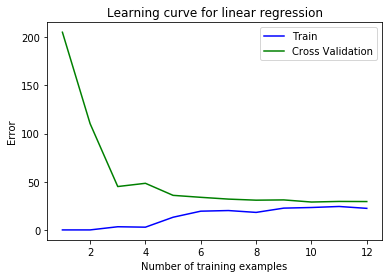

In [7]:
def learning_curve(x_train, y_train, x_val, y_val, lam):
    error_train = np.zeros((x_train.shape[0], 1))
    error_val = np.zeros((x_train.shape[0], 1))
    
    for i in range(1, x_train.shape[0]+1):
        x_train_i = x_train[:i, :]
        y_train_i = y_train[:i, :]
        res = train_linear_reg(x_train_i, y_train_i, lam)
        j_train_i = linear_reg_cost(res.x, x_train_i, y_train_i, lam)
        error_train[i-1] = j_train_i
        
        j_val_i = linear_reg_cost(res.x, x_val, y_val, lam)
        error_val[i-1] = j_val_i
        
    return error_train, error_val
    
error_train0, error_val0 = learning_curve(xx0, y0, xx_val0, y_val0, 0)
#print(error_train0)
#print(error_val0)

x_i = np.array([i for i in range(1, x0.shape[0]+1)])[:, np.newaxis]
plt.plot(x_i, error_train0, color='b', label='Train')
plt.plot(x_i, error_val0, color='g', label='Cross Validation')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

## Polynomial regression

In [8]:
def poly_feature(x, p):
    m = x.shape[0]
    x_poly = np.zeros((m, p))
    
    for i in range(1, p+1):
        x_poly[:, i-1] = x.T ** i
        
    return x_poly

def feature_norm(x):
    mu = np.mean(x, axis=0)
    x_norm = x - mu
    sigma = np.std(x_norm,axis=0)
    x_norm = x_norm / sigma
    
    return x_norm, mu, sigma

p0 = 8
x_poly0 = poly_feature(x0, p0)
x_poly0, mu0, sigma0 = feature_norm(x_poly0)
x_poly0 = np.hstack((np.ones((x_poly0.shape[0], 1)), x_poly0))
#print(mu0)
#print(sigma0)

x_poly_test0 = poly_feature(x_test0, p0)
x_poly_test0 = x_poly_test0 - mu0
x_poly_test0 = x_poly_test0 / sigma0
x_poly_test0 = np.hstack((np.ones((x_poly_test0.shape[0], 1)), x_poly_test0))

x_poly_val0 = poly_feature(x_val0, p0)
x_poly_val0 = x_poly_val0 - mu0
x_poly_val0 = x_poly_val0 / sigma0
x_poly_val0 = np.hstack((np.ones((x_poly_val0.shape[0], 1)), x_poly_val0))

print(x_poly0[1, :])

[ 1.         -0.8389201   0.0013142  -0.25896174 -0.34156482  0.09754927
 -0.45519664  0.26677343 -0.46887381]


### Learning Polynomial Regression

         Current function value: 0.062732
         Iterations: 200
         Function evaluations: 370
         Gradient evaluations: 370


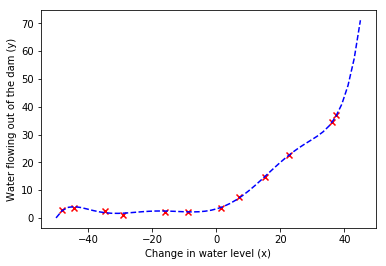

In [9]:
res_poly0 = train_linear_reg(x_poly0, y0, 0)

def plot_fit(mu, sigma, theta, p):
    x = np.linspace(-50, 45).reshape(-1, 1)
    x_poly = poly_feature(x, p)
    x_poly = x_poly - mu
    x_poly = x_poly / sigma
    x_poly = np.hstack((np.ones((x_poly.shape[0], 1)), x_poly))
    theta = theta.reshape(-1, 1)
    plt.plot(x, x_poly.dot(theta), 'b--')
    
    pass

plt.scatter(x0, y0, color='r', marker='x')
plot_fit(mu0, sigma0, res_poly0.x, 8)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 74
         Function evaluations: 150
        

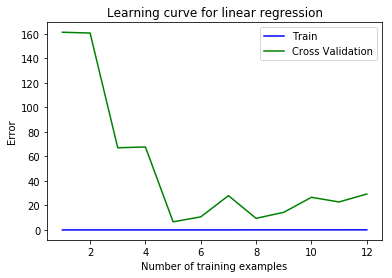

In [33]:
error_train_poly0, error_val_poly0 = learning_curve(x_poly0, y0, x_poly_val0, y_val0, 0)

x_i = np.array([i for i in range(1, x0.shape[0]+1)])[:, np.newaxis]
plt.plot(x_i, error_train_poly0, color='b', label='Train')
plt.plot(x_i, error_val_poly0, color='g', label='Cross Validation')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

### Adjusting the regularization parameter

Optimization terminated successfully.
         Current function value: 6.830463
         Iterations: 34
         Function evaluations: 62
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.070327
         Iterations: 20
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 17.182727
         Iterations: 22
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 13.476899
         Iterations: 17
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 10.781524
         Iterations: 8
         Function evaluations: 18
   

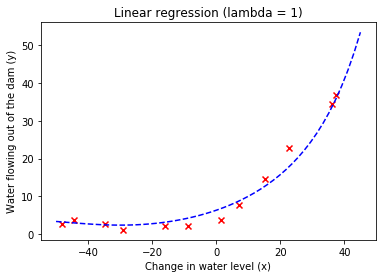

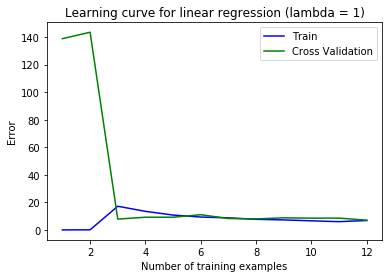

In [35]:
res_poly1 = train_linear_reg(x_poly0, y0, 1)

plt.scatter(x0, y0, color='r', marker='x')
plot_fit(mu0, sigma0, res_poly1.x, 8)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Linear regression (lambda = 1)')
plt.show()

error_train_poly1, error_val_poly1 = learning_curve(x_poly0, y0, x_poly_val0, y_val0, 1)

x_i = np.array([i for i in range(1, x0.shape[0]+1)])[:, np.newaxis]
plt.plot(x_i, error_train_poly1, color='b', label='Train')
plt.plot(x_i, error_val_poly1, color='g', label='Cross Validation')
plt.title('Learning curve for linear regression (lambda = 1)')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

### Selecting λ using a cross validation set

         Current function value: 0.062732
         Iterations: 200
         Function evaluations: 370
         Gradient evaluations: 370
         Current function value: 0.169435
         Iterations: 200
         Function evaluations: 388
         Gradient evaluations: 388
         Current function value: 0.243172
         Iterations: 200
         Function evaluations: 401
         Gradient evaluations: 401
         Current function value: 0.371283
         Iterations: 200
         Function evaluations: 376
         Gradient evaluations: 376
Optimization terminated successfully.
         Current function value: 0.636703
         Iterations: 100
         Function evaluations: 180
         Gradient evaluations: 180
Optimization terminated successfully.
         Current function value: 1.360572
         Iterations: 85
         Function evaluations: 161
         Gradient evaluations: 161
Optimization terminated successfully.
         Current function value: 2.917649
         Iterations: 51

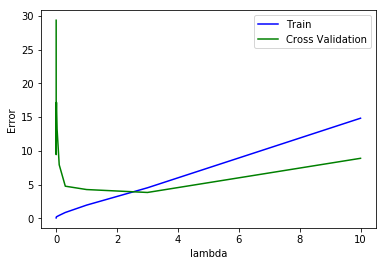

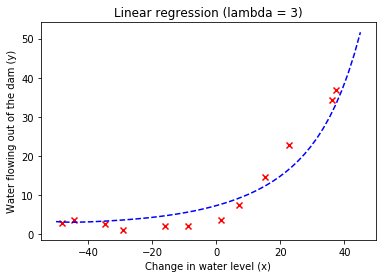

In [36]:
def validation_curve(x_train, y_train, x_val, y_val):
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]).reshape(-1, 1)
    error_train = np.zeros((lambda_vec.shape[0], 1))
    error_val = np.zeros((lambda_vec.shape[0], 1))
    
    for i in range(lambda_vec.shape[0]):
        lam = lambda_vec[i]
        theta = train_linear_reg(x_train, y_train, lam).x
        error_train[i] = linear_reg_cost(theta, x_train, y_train, 0)
        error_val[i] = linear_reg_cost(theta, x_val, y_val, 0)
        
    return lambda_vec, error_train, error_val

lambda_vec0, error_train2, error_val2 = validation_curve(x_poly0, y0, x_poly_val0, y_val0)

plt.plot(lambda_vec0, error_train2, 'b', label='Train')
plt.plot(lambda_vec0, error_val2, 'g', label='Cross Validation')
plt.xlabel('lambda')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

print('reg\t\terr_train\terr_val')
for i in range(lambda_vec0.shape[0]):
    print('%f\t%f\t%f' % (lambda_vec0[i], error_train2[i], error_val2[i]))

res_poly2 = train_linear_reg(x_poly0, y0, 3)

plt.scatter(x0, y0, color='r', marker='x')
plot_fit(mu0, sigma0, res_poly2.x, 8)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Linear regression (lambda = 3)')
plt.show()
